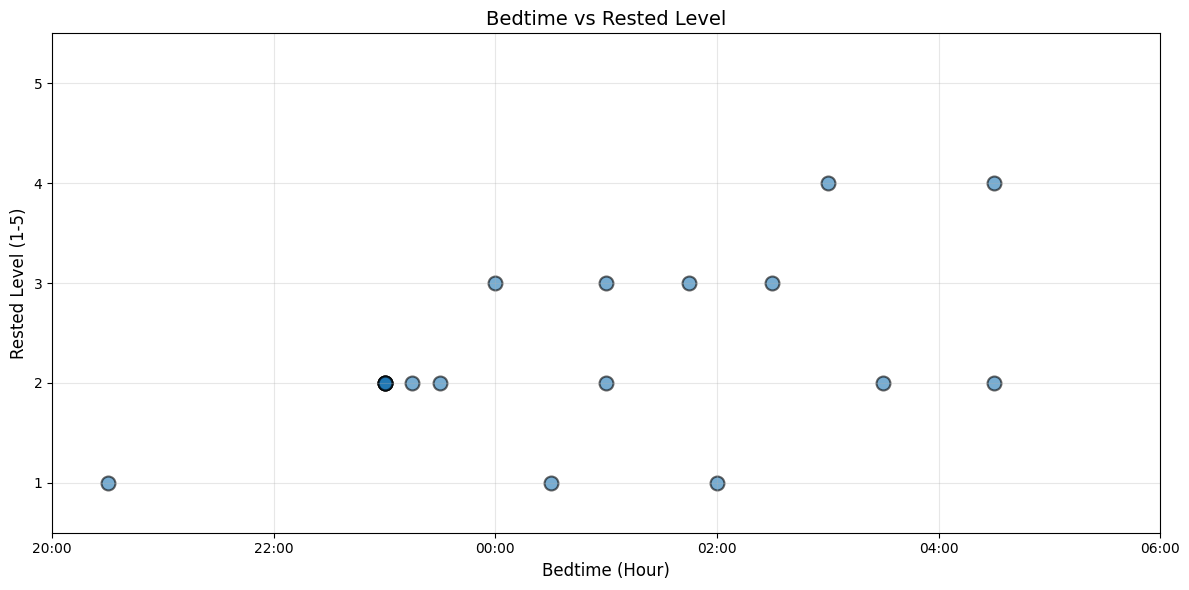

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the survey data
survey_df = pd.read_csv('survey-responses.csv')

# Convert bedtime to hours
def time_to_hours(time_str):
    """Convert time string to hours (decimal format)"""
    if pd.isna(time_str) or time_str == 'X':
        return np.nan
    try:
        time_str = str(time_str).strip()
        time_obj = pd.to_datetime(time_str, format='%H:%M:%S').time()
        hours = time_obj.hour + time_obj.minute / 60
        # Adjust for times after midnight (0-6 AM should be 24-30)
        if hours < 12:
            hours += 24
        return hours
    except:
        return np.nan

survey_df['bedtime_hours'] = survey_df['What time did you get in bed?'].apply(time_to_hours)

# Get rested levels (already numeric, scale 1-5)
survey_df['rested_level'] = pd.to_numeric(survey_df['From scale 1 to 5, how rested do you feel?'], errors='coerce')

# Filter valid data (both bedtime and rested level must be present)
valid_data = survey_df[(survey_df['bedtime_hours'].notna()) & (survey_df['rested_level'].notna())].copy()

# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(valid_data['bedtime_hours'], valid_data['rested_level'],
            s=100, alpha=0.6, edgecolors='black', linewidth=1.5)
plt.xlabel('Bedtime (Hour)', fontsize=12)
plt.ylabel('Rested Level (1-5)', fontsize=12)
plt.title('Bedtime vs Rested Level', fontsize=14)
plt.grid(True, alpha=0.3)

# Format x-axis to show actual times
xticks = range(20, 32, 2)
xtick_labels = [f"{h%24:02d}:00" for h in xticks]
plt.xticks(xticks, xtick_labels)

# Set y-axis to show full scale 1-5
plt.yticks([1, 2, 3, 4, 5])
plt.ylim(0.5, 5.5)

plt.tight_layout()
plt.savefig('bedtime_vs_rested.png', dpi=300, bbox_inches='tight')
plt.show()